## Getting comparisons on GPQA data

In [2]:
import os
import json
events = [name for name in os.listdir('transcript_gpqa/') if '2025' in name]
data = []
for name in events:
    with open(f"transcript_gpqa/{name}/evaluations.json", 'r') as file:
        data.extend(json.load(file))

In [ ]:
models = {
    "Grok 3 Mini": "grok-3-mini",
    # "Gemini 2.5 Flash": "gemini-2.5-flash",
    # "GPT oss 120b": "gpt-oss-120b",
    "Qwen3 235B A22B Instruct 2507": "qwen/qwen3-235b-a22b-2507",
    "Kimi K2 0905": "moonshotai/kimi-k2-0905",
    "Qwen3 Next 80B A3B Instruct": "qwen/qwen3-next-80b-a3b-instruct",
    "Llama 4 Maverick": "meta-llama/llama-4-maverick",
    "DeepSeek V3 0324": "deepseek/deepseek-chat-v3-0324",
    "Gemini 2.5 Flash Lite": "gemini-2.5-flash-lite",
    "Gemini 2.0 Flash": "gemini-2.0-flash-001",
    "Llama 4 Scout": "meta-llama/llama-4-scout",
    "Gemini 2.0 Flash Lite": "gemini-2.0-flash-lite-001",
    "Llama 3.3 70b Instruct": "meta-llama/llama-3.3-70b-instruct",
    "Qwen2.5 72B Instruct": "qwen/qwen-2.5-72b-instruct",
    # "Qwen3 235B A22B": "qwen/qwen3-235b-a22b",
    "Llama 3.1 70B Instruct": "meta-llama/llama-3.1-70b-instruct",
    "GPT 4o mini": "gpt-4o-mini-2024-07-18",
    "GPT 3.5 Turbo": "gpt-3.5-turbo"
}

model_nicks = list(models.keys())

In [50]:
import re

data2 = []
for scenario_index in range(448):
    subset = [i for i in data if i['scenario_index'] == scenario_index][0]

    to_append = {
        'subdomain': subset['subdomain'],
        'question': subset['question'],
        'scenario_index': scenario_index,
    }

    for model in model_nicks:
        if subset[model][1] is not None:
            to_append[model] = subset[model]
        else:
            response = subset[model][0]
            try:
                match = re.search(r'<answer>(.)</answer>', response).group(1)
                if match in ['A', 'B', 'C', 'D']:
                    to_append[model] = [response, match]
                else:
                    raise Exception

            except:
                try:
                    match2 = re.search(r'boxed{(.)}', response).group(1)
                    if match in ['A', 'B', 'C', 'D']:
                        to_append[model] = [response, match2]
                    else:
                        raise Exception
                except:
                    to_append[model] = [response, None]
    data2.append(to_append)

In [65]:
json.dump(data2, open('evaluations_gpqa_parsed.json', 'w'), indent=4)

In [56]:
for item in data2:
    # print(item['scenario_index'])
    l = [item[i][1] for i in model_nicks]
    print(l)
    print(len([i for i in l if i is not None]))

['A', 'A', 'A', 'A', 'A', 'A', None, 'A', 'C', 'C', 'A', 'A', 'A', 'A', 'C']
14
['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'C']
15
['A', 'B', 'A', None, 'A', 'B', None, 'A', 'C', 'A', 'C', 'C', 'C', 'A', 'A']
13
['B', None, 'A', None, 'A', 'B', None, 'B', 'B', 'B', 'A', 'B', 'C', 'C', 'B']
12
['C', None, 'B', None, None, 'A', None, None, None, 'B', 'B', 'C', 'A', 'B', 'D']
9
['A', None, 'A', 'A', 'A', 'A', 'A', None, 'A', 'A', 'A', 'A', None, 'A', 'C']
12
['A', 'A', 'C', None, 'D', 'B', 'A', 'A', 'C', 'B', 'D', 'A', 'B', 'D', 'B']
14
['A', 'A', 'A', 'A', 'B', 'A', None, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
14
['C', 'C', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'B']
15
['C', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B']
15
['A', 'B', 'A', 'B', 'A', 'D', None, 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
14
['B', 'B', 'B', 'B', 'B', 'B', None, 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A']
14
['A', 'A', 'A', 'A', 'A', 'A', Non

In [ ]:
import itertools

count = 0
for item in data2:
    answer_choices = set([item[i][1].upper() for i in model_nicks if item[i][1] is not None])
    print(answer_choices)
    combos = list(itertools.combinations(answer_choices, 2))
    print(combos)
    count += len(combos)

In [66]:
for answer1, answer2 in combos:
    print(answer1, answer2)

A D


In [78]:
evaluation = {}

model_nicks = ['a','b','c','d']

for i in range(4):
    evaluation[model_nicks[i]] = []
    for answer1, answer2 in [['a','b'], ['a','c']]:

        judge_response = 'hi'

        evaluation[model_nicks[i]].append([answer1, answer2, judge_response])

        # print(evaluation)

In [79]:
evaluation

{'a': [['a', 'b', 'hi'], ['a', 'c', 'hi']],
 'b': [['a', 'b', 'hi'], ['a', 'c', 'hi']],
 'c': [['a', 'b', 'hi'], ['a', 'c', 'hi']],
 'd': [['a', 'b', 'hi'], ['a', 'c', 'hi']]}

In [101]:
import numpy as np
k = 19
r = np.linspace(0,448,21)[k:k+2]
range(int(r[0]), int(r[1]))

range(425, 448)

## getting GPQA comparisons

In [11]:
import os
import json
events = [name for name in os.listdir('transcript_gpqa/') if '2025' in name]
data = []
for name in events:
    with open(f"transcript_gpqa/{name}/evaluations.json", 'r') as file:
        data.extend(json.load(file))

In [12]:
data = sorted(data, key=lambda x: x['scenario_index'])
json.dump(data, open('gpqa_comparisons.json', 'w'), indent=4)

## forming evaluations

In [146]:
models = {
    "Grok 3 Mini": "grok-3-mini",
    # "Gemini 2.5 Flash": "gemini-2.5-flash",
    # "GPT oss 120b": "gpt-oss-120b",
    "Qwen3 235B A22B Instruct 2507": "qwen/qwen3-235b-a22b-2507",
    "Kimi K2 0905": "moonshotai/kimi-k2-0905",
    "Qwen3 Next 80B A3B Instruct": "qwen/qwen3-next-80b-a3b-instruct",
    "Llama 4 Maverick": "meta-llama/llama-4-maverick",
    "DeepSeek V3 0324": "deepseek/deepseek-chat-v3-0324",
    "Gemini 2.5 Flash Lite": "gemini-2.5-flash-lite",
    "Gemini 2.0 Flash": "gemini-2.0-flash-001",
    "Llama 4 Scout": "meta-llama/llama-4-scout",
    "Gemini 2.0 Flash Lite": "gemini-2.0-flash-lite-001",
    "Llama 3.3 70b Instruct": "meta-llama/llama-3.3-70b-instruct",
    "Qwen2.5 72B Instruct": "qwen/qwen-2.5-72b-instruct",
    # "Qwen3 235B A22B": "qwen/qwen3-235b-a22b",
    "Llama 3.1 70B Instruct": "meta-llama/llama-3.1-70b-instruct",
    "GPT 4o mini": "gpt-4o-mini-2024-07-18",
    "GPT 3.5 Turbo": "gpt-3.5-turbo"
}

model_nicks = list(models.keys())
num_models = len(model_nicks)

In [147]:
import json
import re
responses = json.load(open('transcript_gpqa/gpqa_responses.json', 'r'))
judgments = json.load(open('transcript_gpqa/gpqa_judgments.json', 'r'))

In [148]:
comparisons = []

no_choice_count = 0
for scenario in range(448):
    responses_dict = [i for i in responses if i['scenario_index'] == scenario][0]
    judgments_dict = [i for i in judgments if i['scenario_index'] == scenario][0]
    for i in range(num_models):
        for j in range(num_models):
            for k in range(j+1, num_models):
                if j == k: continue

                answer_j = responses_dict[model_nicks[j]][1]
                answer_k = responses_dict[model_nicks[k]][1]

                if answer_j is None or answer_k is None: continue
                if answer_j == answer_k: 
                    comparisons.append([0, scenario, i, j, k, 0])
                    continue

                judgment_i = [None, None, None]
                for judgment in judgments_dict[model_nicks[i]]:
                    if set(judgment[:2]) == set([answer_j, answer_k]) and judgment[2] is not None:
                        judgment_i = judgment
                        break
                if judgment_i[2] is None: continue
                
                try:
                    m = int(re.search(r'<choice>(.)</choice>', judgment_i[2]).group(1))
                    if m in [1,2]:
                        # if the judge saw answers in the same order as j,k
                        if answer_j == judgment_i[0]:
                            # comparisons.append([scenario, i, j, k, 2-m]) # map {1,2} to {1,0}, i.e. if it chose answer 1, record win for j
                            comparisons.append([0, scenario, i, j, k, m]) # report {1,2}, i.e. if it chose answer 1, record win for j
                        # if the judge saw answers in the opposite order as j,k
                        else:
                            # comparisons.append([scenario, i, j, k, m-1]) # map {1,2} to {0,1}, i.e. if it chose answer 1, record win for k
                            comparisons.append([0, scenario, i, j, k, 3-m]) # map {1,2} to {2,1}, i.e. if it chose answer 1, record win for k
                except:
                    no_choice_count += 1
                    pass

print(f'Number of judge comparisons without a choice: {no_choice_count}')


Number of judge comparisons without a choice: 17875


In [149]:
len(comparisons)

572708

## Training BT models

In [160]:
from BT import *
from eigentrust import *
import random

In [161]:
def train_vector_bt(model, dataloader, lr, weight_decay, max_epochs, device, save_path=None, normalize=False, use_btd=False):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    if use_btd:
        loss_fn = nn.CrossEntropyLoss()
    else:
        loss_fn = nn.BCELoss()

    loss_history = []

    for epoch in range(1, max_epochs+1):
        total_loss = 0.0
        model.train()

        for i, j, k, r in dataloader:
            i = i.to(device)
            j = j.to(device)
            k = k.to(device)
            r = r.to(device)

            if use_btd:
                r = r.long()  # CrossEntropyLoss expects long tensor
                logits = model(i, j, k)
                loss = loss_fn(logits, r) # CE expects logits, unnormalized, as it has built in softmax
            else:
                p = model(i, j, k)
                loss = loss_fn(p, r)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if normalize:
                with torch.no_grad():
                    model.v.weight.data = F.normalize(model.v.weight.data, p=2, dim=1)

            total_loss += loss.item() * r.size(0)

        avg_loss = total_loss / len(dataloader.dataset)
        loss_history.append(avg_loss)
    
        if len(loss_history) >= 3 and  np.average(np.abs(np.diff(loss_history[-3:]))) <= .0001:
            print('loss converged, breaking')
            break

        print(f"Epoch {epoch:>3d}, Loss = {avg_loss:.4f}")

    return loss_history

In [162]:
num_models = len(set([i[1] for i in comparisons]))

d = 2
NORMALIZE = False
USE_BTD = False

lr = 1e-3
weight_decay = 0
max_epochs = 1000

batch_size=32
dataloader = DataLoader(dataset = Comparisons(comparisons), batch_size=batch_size, shuffle=True)

model = VectorBT(num_models, d)
train_vector_bt(
    model,
    dataloader,
    lr=lr,
    weight_decay=weight_decay,
    max_epochs=max_epochs,
    device='cpu',
    save_path=None,
    normalize=NORMALIZE,
    use_btd=USE_BTD
)

ValueError: too many values to unpack (expected 5)

In [109]:
device = 'cpu'
T = compute_trust_matrix(model, device)
T = row_normalize(T)
t = eigentrust(T, alpha=0)

  1%|          | 8/1000 [00:00<00:00, 1860.93it/s]


## TRaining BTD Model

In [150]:
from BT_criteria import *
from eigentrust import *
import random

In [154]:
def train_vector_bt(model, dataloader, lr, weight_decay, max_epochs, device, save_path=None, normalize=False, use_btd=False):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    if use_btd:
        loss_fn = nn.CrossEntropyLoss()
    else:
        loss_fn = nn.BCELoss()

    loss_history = []

    for epoch in range(1, max_epochs+1):
        total_loss = 0.0
        model.train()

        for c_idx, i_idx, j_idx, k_idx, r in dataloader:
            c_idx = c_idx.to(device)
            i_idx = i_idx.to(device)
            j_idx = j_idx.to(device)
            k_idx = k_idx.to(device)
            r = r.to(device)

            if use_btd:
                r = r.long()  # CrossEntropyLoss expects long tensor

                logits = model(c_idx, i_idx, j_idx, k_idx)
                loss = loss_fn(logits, r) # CE expects logits, unnormalized, as it has built in softmax
            else:
                p = model(i_idx, j_idx, k_idx)
                loss = loss_fn(p, r)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if normalize:
                with torch.no_grad():
                    model.v.weight.data = F.normalize(model.v.weight.data, p=2, dim=1)

            total_loss += loss.item() * r.size(0)

        avg_loss = total_loss / len(dataloader.dataset)
        loss_history.append(avg_loss)

        print(f"Epoch {epoch:>3d}, Loss = {avg_loss:.4f}")
    
        if len(loss_history) >= 3 and  np.average(np.abs(np.diff(loss_history[-3:]))) <= .0001:
            print('loss converged, breaking')
            break

    return loss_history


In [155]:
num_models = 15
num_criteria = 1

d = 2
NORMALIZE=False
USE_BTD=True

lr = 1e-3
weight_decay = 0
max_epochs = 1000

batch_size=32
dataloader = DataLoader(dataset = Comparisons(comparisons), batch_size=batch_size, shuffle=True)

model = VectorBTD(num_criteria, num_models, d)
train_vector_bt(
    model,
    dataloader,
    lr=lr,
    weight_decay=weight_decay,
    max_epochs=max_epochs,
    device='cpu',
    save_path=None,
    normalize=NORMALIZE,
    use_btd=USE_BTD
)

device = 'cpu'
T = compute_trust_matrix_ties(model, device)
t = eigentrust(T, alpha=0)

Epoch   1, Loss = 0.9634
Epoch   2, Loss = 0.9548
Epoch   3, Loss = 0.9546
Epoch   4, Loss = 0.9546
Epoch   5, Loss = 0.9547
loss converged, breaking


  1%|          | 6/1000 [00:00<00:00, 1151.39it/s]


In [156]:
t

tensor([0.0737, 0.0756, 0.0681, 0.0758, 0.0735, 0.0706, 0.0679, 0.0717, 0.0686,
        0.0651, 0.0660, 0.0627, 0.0595, 0.0531, 0.0481])

In [171]:
list(reversed(np.argsort(t.numpy())))

[3, 1, 0, 4, 7, 5, 8, 2, 6, 10, 9, 11, 12, 13, 14]

In [189]:
from itertools import combinations

def kendall_tau_distance(rank1, rank2):
    """
    Compute the Kendall tau distance between two rankings.
    
    rank1, rank2: lists of items representing two permutations of the same set.
    Returns: integer distance (number of discordant pairs).
    """
    if set(rank1) != set(rank2):
        raise ValueError("Rankings must contain the same elements")

    # Map each item in rank2 to its position
    pos2 = {item: i for i, item in enumerate(rank2)}

    # Count discordant pairs
    discordant = 0
    for i, j in combinations(range(len(rank1)), 2):
        a, b = rank1[i], rank1[j]
        # Compare orderings in rank1 and rank2
        if (pos2[a] - pos2[b]) * (i - j) < 0:
            discordant += 1

    return discordant


# Example usage:
rank1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]       # ground truth
rank2 = [1, 3, 0, 4, 7, 5, 8, 6, 2, 10, 9, 11, 12, 13, 14]      # model ranking
rank3 = [i-1 for i in [3, 2, 8, 1, 4, 6, 9, 5, 7, 11, 10, 12, 13, 14, 15]]
print("Kendall tau distance:", kendall_tau_distance(rank1, rank2))
print("Kendall tau distance:", kendall_tau_distance(rank1, rank3))


Kendall tau distance: 12
Kendall tau distance: 12


Kendall tau distance was 12 for both BT and BTD models! (ties don't matter)

In [178]:
t = [0.0737, 0.0756, 0.0681, 0.0758, 0.0735, 0.0706, 0.0679, 0.0717, 0.0686, 0.0651, 0.0660, 0.0627, 0.0595, 0.0531, 0.0481]
gpqa = [.84, .775, .758, .729, .698, .684, .646, .621, .572, .515, .505, .49, .417, .402, .308]

In [180]:
l = list(reversed(np.argsort(np.array(t))))
l

[3, 1, 0, 4, 7, 5, 8, 2, 6, 10, 9, 11, 12, 13, 14]

In [186]:
ranking = []
for i, val in enumerate(t):
    print(val, l.index(i)+1)
    ranking.append(l.index(i)+1)

0.0737 3
0.0756 2
0.0681 8
0.0758 1
0.0735 4
0.0706 6
0.0679 9
0.0717 5
0.0686 7
0.0651 11
0.066 10
0.0627 12
0.0595 13
0.0531 14
0.0481 15


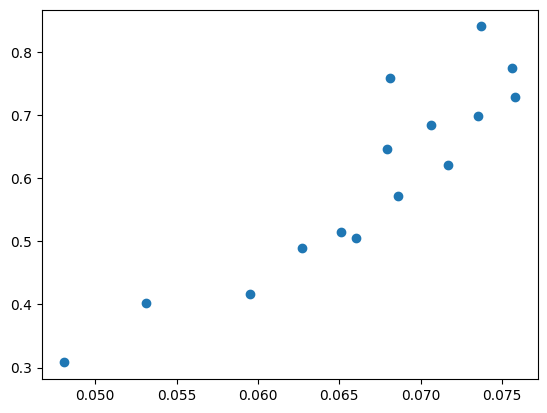

In [168]:
plt.scatter(t, gpqa)
plt.show()

In [177]:
for i in model_nicks:
    print(f'\\texttt{{{i}}}')

\texttt{Grok 3 Mini}
\texttt{Qwen3 235B A22B Instruct 2507}
\texttt{Kimi K2 0905}
\texttt{Qwen3 Next 80B A3B Instruct}
\texttt{Llama 4 Maverick}
\texttt{DeepSeek V3 0324}
\texttt{Gemini 2.5 Flash Lite}
\texttt{Gemini 2.0 Flash}
\texttt{Llama 4 Scout}
\texttt{Gemini 2.0 Flash Lite}
\texttt{Llama 3.3 70b Instruct}
\texttt{Qwen2.5 72B Instruct}
\texttt{Llama 3.1 70B Instruct}
\texttt{GPT 4o mini}
\texttt{GPT 3.5 Turbo}
